In [1]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Carga del dataset
df_data = pd.read_csv("cancer_data.csv")

In [3]:
df_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
nan_count = df_data.isna().sum()
total_nan_count = nan_count.sum()
print("Total de valores NaN en el DataFrame:", total_nan_count)

Total de valores NaN en el DataFrame: 0


In [6]:
# Eliminar la columna de ID ya que no aporta información relevante para el modelo
df_data.drop('id', axis=1, inplace=True)

In [7]:
# Convertir la variable 'Diagnosis' a 0 para 'B' (Benigno) y 1 para 'M' (Maligno)
df_data['diagnosis'] = df_data['diagnosis'].map({'B': 0, 'M': 1})

In [8]:
X = df_data.drop('diagnosis', axis=1)
y = df_data['diagnosis']

In [9]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [11]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#---------------------------------------------------------- RANDOM FOREST -----------------------------------------------------
# Crear y entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Realizar predicciones en el conjunto de prueba
y_rf_pred = model.predict(X_test_scaled)

In [15]:
# Métricas de evaluación en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_rf_pred)
test_precision = precision_score(y_test, y_rf_pred)
test_recall = recall_score(y_test, y_rf_pred)
test_f1 = f1_score(y_test, y_rf_pred)

print("\nMétricas de evaluación en el conjunto de prueba:")
print("Precisión:", test_precision)
print("Recuerdo:", test_recall)
print("F1-score:", test_f1)
print("Precisión global:", test_accuracy)



Métricas de evaluación en el conjunto de prueba:
Precisión: 0.975609756097561
Recuerdo: 0.9302325581395349
F1-score: 0.9523809523809524
Precisión global: 0.9649122807017544


In [16]:
# Mostrar la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
print("MATRIZ DE CONFUSION PARA PRUEBA:")
print(conf_matrix_rf)

MATRIZ DE CONFUSION PARA PRUEBA:
[[70  1]
 [ 3 40]]


Text(0.5, 1.0, 'MATRIZ DE CONFUSION PARA PRUEBA - Random Forest')

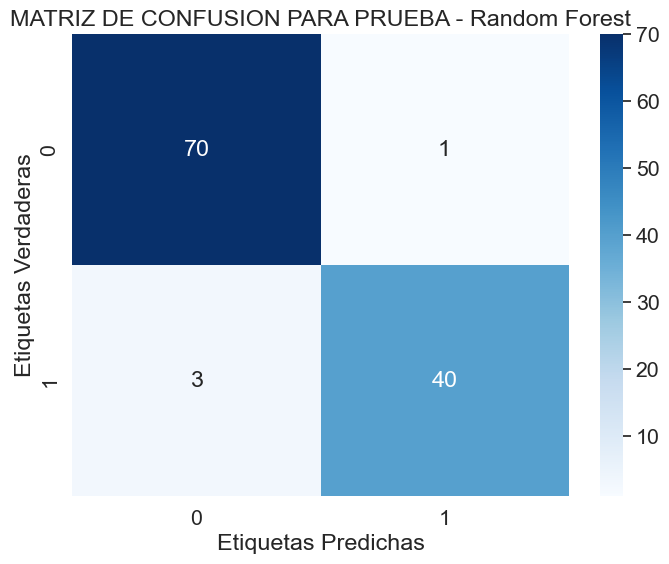

In [17]:
classes = ["0", "1"]

# Crear la figura y el eje para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Tamaño de fuente
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Configurar etiquetas y título
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('MATRIZ DE CONFUSION PARA PRUEBA - Random Forest')

In [18]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_rf_pred = model.predict(X_train_scaled)

In [19]:
# Métricas de evaluación en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_rf_pred)
train_precision = precision_score(y_train, y_train_rf_pred)
train_recall = recall_score(y_train, y_train_rf_pred)
train_f1 = f1_score(y_train, y_train_rf_pred)

print("Métricas de evaluación en el conjunto de entrenamiento:")
print("Precisión:", train_precision)
print("Recuerdo:", train_recall)
print("F1-score:", train_f1)
print("Precisión global:", train_accuracy)

Métricas de evaluación en el conjunto de entrenamiento:
Precisión: 1.0
Recuerdo: 1.0
F1-score: 1.0
Precisión global: 1.0


In [20]:
conf_matrix_train_rf= confusion_matrix(y_train, y_train_rf_pred)

# Visualizar la matriz de confusión
print("MATRIZ DE CONFUSION PARA ENTRENAMIENTO")
print(conf_matrix_train_rf)

MATRIZ DE CONFUSION PARA ENTRENAMIENTO
[[286   0]
 [  0 169]]


Text(0.5, 1.0, 'MATRIZ DE CONFUSION PARA ENTRENAMIENTO - Random Forest')

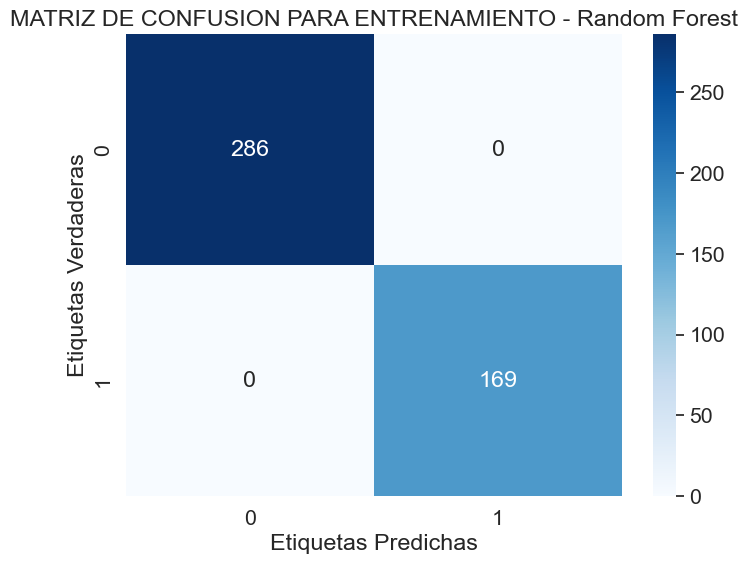

In [21]:
classes = ["0", "1"]

# Crear la figura y el eje para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Tamaño de fuente
sns.heatmap(conf_matrix_train_rf, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Configurar etiquetas y título
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('MATRIZ DE CONFUSION PARA ENTRENAMIENTO - Random Forest')

In [22]:
#-------------------------------------------------------------- SVM -------------------------------------------------------
# Crear un clasificador SVM
svm_classifier = SVC(kernel='linear', random_state=42)

# Entrenar el clasificador SVM
svm_classifier.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [23]:
# Realizar predicciones en el conjunto de prueba
y_svm_pred = svm_classifier.predict(X_test_scaled)

In [24]:
# Métricas de evaluación en el conjunto de prueba
svm_test_accuracy = accuracy_score(y_test, y_svm_pred)
svm_test_precision = precision_score(y_test, y_svm_pred)
svm_test_recall = recall_score(y_test, y_svm_pred)
svm_test_f1 = f1_score(y_test, y_svm_pred)

print("\nMétricas de evaluación en el conjunto de prueba:")
print("Precisión:", svm_test_precision)
print("Recuerdo:", svm_test_recall)
print("F1-score:", svm_test_f1)
print("Precisión global:", svm_test_accuracy)



Métricas de evaluación en el conjunto de prueba:
Precisión: 0.9318181818181818
Recuerdo: 0.9534883720930233
F1-score: 0.942528735632184
Precisión global: 0.956140350877193


In [25]:

conf_matrix_svm= confusion_matrix(y_test, y_svm_pred)

# Visualizar la matriz de confusión
print("MATRIZ DE CONFUSION PARA PRUEBA")
print(conf_matrix_svm)

MATRIZ DE CONFUSION PARA PRUEBA
[[68  3]
 [ 2 41]]


Text(0.5, 1.0, 'MATRIZ DE CONFUSION PARA PRUEBA - SVM')

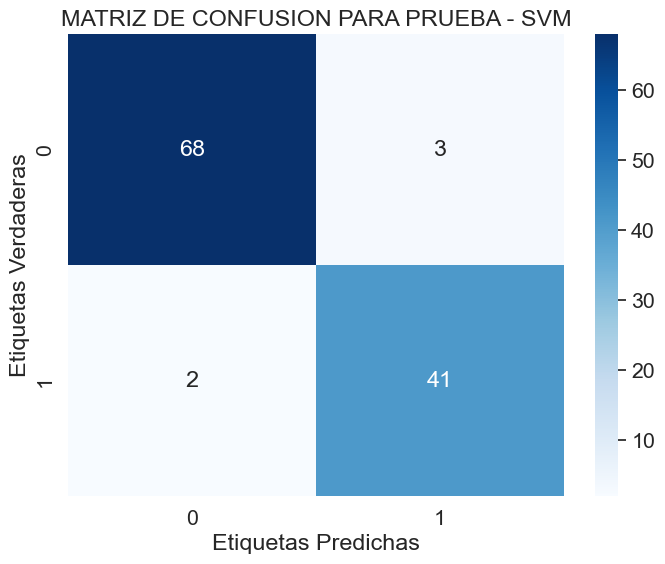

In [26]:
classes = ["0", "1"]

# Crear la figura y el eje para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Tamaño de fuente
sns.heatmap(conf_matrix_svm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Configurar etiquetas y título
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('MATRIZ DE CONFUSION PARA PRUEBA - SVM')

In [27]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_SVM_pred = svm_classifier.predict(X_train_scaled)


In [28]:
# Métricas de evaluación en el conjunto de Entrenamiento
svm_train_accuracy = accuracy_score(y_train, y_train_SVM_pred)
svm_train_precision = precision_score(y_train, y_train_SVM_pred)
svm_train_recall = recall_score(y_train, y_train_SVM_pred)
svm_train_f1 = f1_score(y_train, y_train_SVM_pred)

print("\nMétricas de evaluación en el conjunto de entrenamiento:")
print("Precisión:", svm_train_precision)
print("Recuerdo:", svm_train_recall)
print("F1-score:", svm_train_f1)
print("Precisión global:", svm_train_accuracy)


Métricas de evaluación en el conjunto de entrenamiento:
Precisión: 0.9822485207100592
Recuerdo: 0.9822485207100592
F1-score: 0.9822485207100592
Precisión global: 0.9868131868131869


In [29]:
conf_matrix_train_svm= confusion_matrix(y_train, y_train_SVM_pred)

# Visualizar la matriz de confusión
print("MATRIZ DE CONFUSION PARA ENTRENAMIENTO")
print(conf_matrix_train_svm)

MATRIZ DE CONFUSION PARA ENTRENAMIENTO
[[283   3]
 [  3 166]]


Text(0.5, 1.0, 'MATRIZ DE CONFUSION PARA ENTRENAMIENTO - SVM')

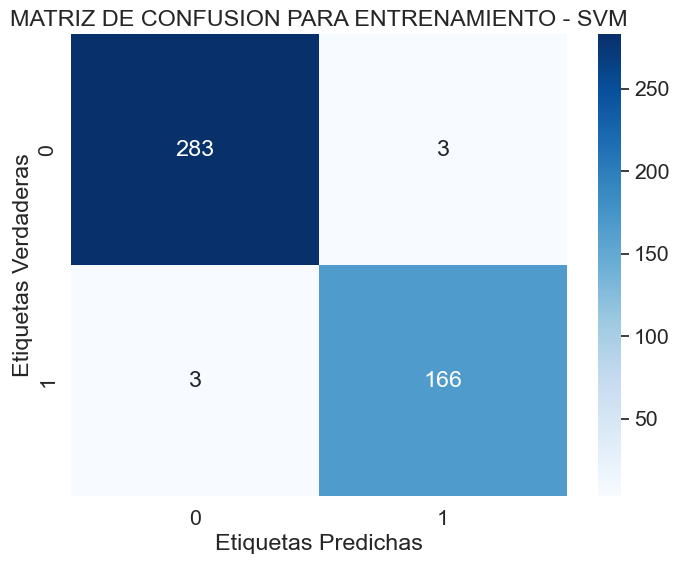

In [30]:
classes = ["0", "1"]

# Crear la figura y el eje para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Tamaño de fuente
sns.heatmap(conf_matrix_train_svm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Configurar etiquetas y título
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('MATRIZ DE CONFUSION PARA ENTRENAMIENTO - SVM')

In [31]:
#---------------------------------------------------REGRESION LOGISTICA-------------------------------------------------------
# Crear y entrenar el modelo de regresión logística
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [32]:
# Realizar predicciones en el conjunto de prueba
y_pred_lr = logistic_regression.predict(X_test_scaled)

In [33]:
# Métricas de evaluación en el conjunto de prueba
lr_test_accuracy = accuracy_score(y_test, y_pred_lr)
lr_test_precision = precision_score(y_test, y_pred_lr)
lr_test_recall = recall_score(y_test, y_pred_lr)
lr_test_f1 = f1_score(y_test, y_pred_lr)

print("\nMétricas de evaluación en el conjunto de prueba:")
print("Precisión:", lr_test_precision)
print("Recuerdo:", lr_test_recall)
print("F1-score:", lr_test_f1)
print("Precisión global:", lr_test_accuracy)


Métricas de evaluación en el conjunto de prueba:
Precisión: 0.9761904761904762
Recuerdo: 0.9534883720930233
F1-score: 0.9647058823529412
Precisión global: 0.9736842105263158


In [34]:
conf_matrix_lr= confusion_matrix(y_test, y_pred_lr)

# Visualizar la matriz de confusión
print("MATRIZ DE CONFUSION PARA PRUEBA")
print(conf_matrix_lr)

MATRIZ DE CONFUSION PARA PRUEBA
[[70  1]
 [ 2 41]]


Text(0.5, 1.0, 'MATRIZ DE CONFUSION PARA PRUEBA - Regresion Logistica')

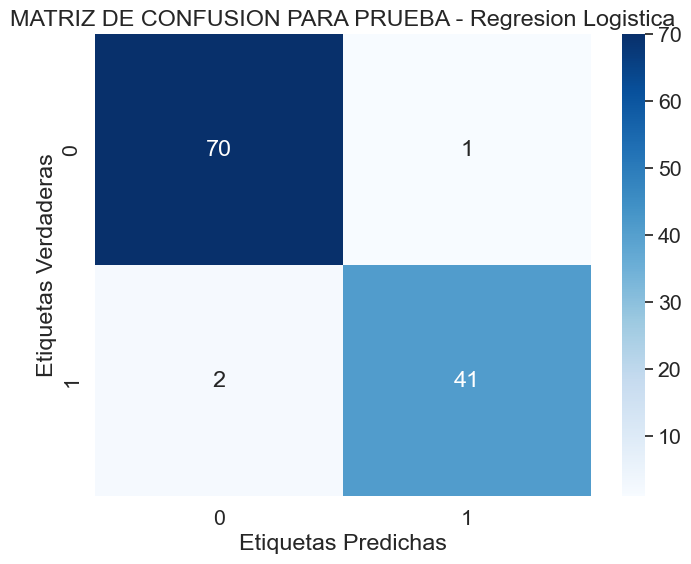

In [35]:
classes = ["0", "1"]

# Crear la figura y el eje para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Tamaño de fuente
sns.heatmap(conf_matrix_lr, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Configurar etiquetas y título
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('MATRIZ DE CONFUSION PARA PRUEBA - Regresion Logistica')

In [36]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_lr_pred = logistic_regression.predict(X_train_scaled)

In [37]:
# Métricas de evaluación en el conjunto de Entrenamiento
lr_train_accuracy = accuracy_score(y_train, y_train_lr_pred)
lr_train_precision = precision_score(y_train, y_train_lr_pred)
lr_train_recall = recall_score(y_train, y_train_lr_pred)
lr_train_f1 = f1_score(y_train, y_train_lr_pred)

print("\nMétricas de evaluación en el conjunto de prueba:")
print("Precisión:", lr_train_precision)
print("Recuerdo:", lr_train_recall)
print("F1-score:", lr_train_f1)
print("Precisión global:", lr_train_accuracy)


Métricas de evaluación en el conjunto de prueba:
Precisión: 0.9880239520958084
Recuerdo: 0.9763313609467456
F1-score: 0.9821428571428571
Precisión global: 0.9868131868131869


In [38]:
conf_matrix_train_lr= confusion_matrix(y_train, y_train_lr_pred)

# Visualizar la matriz de confusión
print("MATRIZ DE CONFUSION PARA ENTRENAMIENTO")
print(conf_matrix_train_lr)

MATRIZ DE CONFUSION PARA ENTRENAMIENTO
[[284   2]
 [  4 165]]


Text(0.5, 1.0, 'MATRIZ DE CONFUSION PARA ENTRENAMIENTO - Regresion Logistica')

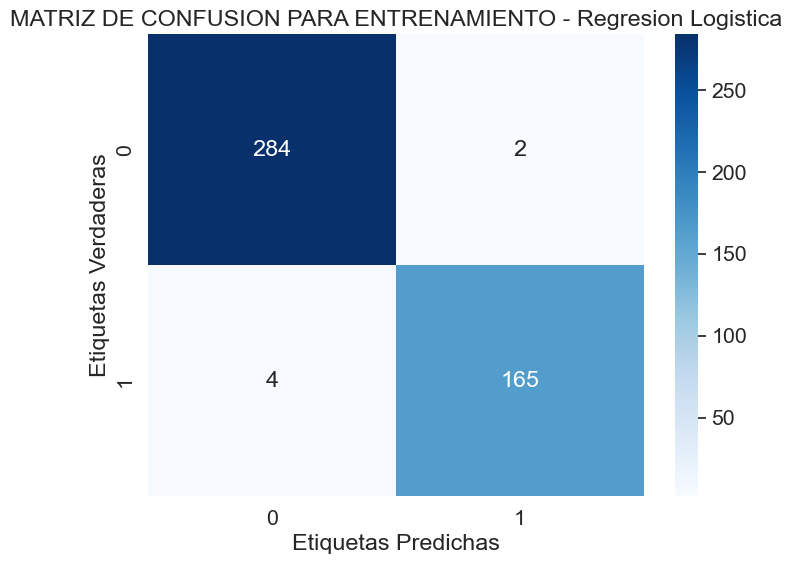

In [39]:
classes = ["0", "1"]

# Crear la figura y el eje para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Tamaño de fuente
sns.heatmap(conf_matrix_train_lr, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Configurar etiquetas y título
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('MATRIZ DE CONFUSION PARA ENTRENAMIENTO - Regresion Logistica')